# 02 Panel Analysis

## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels as lm

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:
import sys
sys.path.append('../')
sys.path.append('../../kungfu/')
import kungfu as kf

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
sns.set()
sns.set(rc={'figure.figsize': (17, 6)})

## Load data

In [6]:
return_matrix = pd.read_csv('../data/processed/return_matrix.csv').set_index('date')
return_matrix.index = pd.to_datetime(return_matrix.index, yearfirst=True)
return_matrix.columns.name = 'permno'

In [7]:
#pd.read_hdf('../data/processed/return_matrix_2019.hdf')

In [8]:
df_ff_raw = pd.read_pickle('../data/external/df_ff_raw.pkl')

## Panel Regressions
### Prepare

In [9]:
df_panel = kf.FinancialDataFrame()
opt_dates = return_matrix.index[return_matrix.index.year != pd.Series(return_matrix.index.year).shift(-1)][1:-1]
opt_indices = [return_matrix.index.get_loc(i) for i in opt_dates]

In [10]:
inc = pd.read_csv('../data/external/IN_yearly.csv', header=None)
inc.index = return_matrix.columns
inc.columns = opt_dates.year
inc = inc.stack()
df_panel['incoming'] = inc

outg = pd.read_csv('../data/external/OUT_yearly.csv', header=None)
outg.index = return_matrix.columns
outg.columns = opt_dates.year
outg = outg.stack()
df_panel['outgoing'] = outg

In [11]:
capm = kf.FactorModel(df_ff_raw['mktrf'])

df_panel['capm_beta'] = np.nan
df_panel['capm_alpha'] = np.nan
for end in opt_indices:
    start = end-498
    data = return_matrix.iloc[start:end+1,:]
    year = return_matrix.index[end].year
    results = capm.fit(data)
    
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_beta'] = results.betas.values
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_alpha'] = results.alphas.values

In [12]:
capm = kf.FactorModel(df_ff_raw['mktrf'])

df_panel['capm_beta_1y'] = np.nan
df_panel['capm_alpha_1y'] = np.nan

for end in opt_indices:
    startdate = end+1
    enddate = end+252
    data = return_matrix.iloc[startdate:enddate+1,:]
    year = return_matrix.index[end].year
    results = capm.fit(data)
    
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_beta_1y'] = results.betas.values
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_alpha_1y'] = results.alphas.values

In [13]:
capm = kf.FactorModel(df_ff_raw['mktrf'])

df_panel['capm_beta_1m'] = np.nan
df_panel['capm_alpha_1m'] = np.nan

for end in opt_indices:
    startdate = end+1
    enddate = end+21
    data = return_matrix.iloc[startdate:enddate+1,:]
    year = return_matrix.index[end].year
    results = capm.fit(data)
    
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_beta_1m'] = results.betas.values
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_alpha_1m'] = results.alphas.values

In [14]:
capm = kf.FactorModel(df_ff_raw['mktrf'])

df_panel['capm_beta_3m'] = np.nan
df_panel['capm_alpha_3m'] = np.nan

for end in opt_indices:
    startdate = end+1
    enddate = end+63
    data = return_matrix.iloc[startdate:enddate+1,:]
    year = return_matrix.index[end].year
    results = capm.fit(data)
    
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_beta_3m'] = results.betas.values
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_alpha_3m'] = results.alphas.values

In [15]:
df_panel

incoming  outgoing  capm_beta  capm_alpha  capm_beta_1y  \
permno date                                                            
10104  2001  0.015617  0.014825   2.268738    0.000809      1.598201   
       2002  0.018880  0.012479   1.949791    0.000394      1.447317   
       2003  0.012450  0.007430   1.540294    0.000014      1.379796   
       2004  0.005524  0.004213   1.432869   -0.000593      0.976659   
       2005  0.001920  0.001770   1.180714   -0.000540      0.971345   
...               ...       ...        ...         ...           ...   
92655  2014  0.001419  0.001425   0.863452    0.000802      1.039238   
       2015  0.002991  0.002029   0.990717    0.000780      0.784668   
       2016  0.002529  0.002157   0.916137    0.000742      0.770285   
       2017  0.000581  0.000781   0.771052    0.000862      0.964433   
       2018  0.001382  0.001451   0.938782    0.000697      0.692755   

             capm_alpha_1y  capm_beta_1m  capm_alpha_1m  capm_beta_3m  \
permno date                                                             
10104  2001       0.001205      2.257448       0.012636      0.989003   
       2002      -0.000559      1.690478       0.007737      1.415551   
       2003      -0.000315      1.661619      -0.000361      1.192260   
       2004      -0.000611      1.333925       0.001105      1.474856   
       2005       0.000973      1.088020      -0.000294      1.051477   
...                    ...           ...            ...           ...   
92655  2014       0.000739      1.377250       0.004159      1.272114   
       2015       0.000937      0.846772       0.001738      0.884146   
       2016       0.000721      0.416326       0.000388      0.701755   
       2017       0.000685      1.440467      -0.000285      0.910765   
       2018       0.000067      0.625813       0.001415      0.882190   

             capm_alpha_3m  
permno date                 
10104  2001      -0.000843  
       2002       0.001211  
       2003      -0.001622  
       2004      -0.000485  
       2005       0.001113  
...                    ...  
92655  2014       0.002159  
       2015       0.001498  
       2016       0.000018  
       2017       0.000619  
       2018      -0.002149  

[4032 rows x 10 columns]

In [16]:
df_performance = kf.FinancialDataFrame()
df_performance['return_1y'] = (return_matrix.groupby(pd.Grouper(freq='Y')).mean()*252).stack().swaplevel(0,1)
df_performance['return_1m'] = (return_matrix.groupby(pd.Grouper(freq='M')).mean()*252).stack().swaplevel(0,1)
df_performance['return_3m'] = (return_matrix.groupby(pd.Grouper(freq='Q')).mean()*252).stack().swaplevel(0,1)

df_performance['variance_1y'] = (return_matrix.groupby(pd.Grouper(freq='Y')).var()*252).stack().swaplevel(0,1)
df_performance['variance_1m'] = (return_matrix.groupby(pd.Grouper(freq='M')).var()*252).stack().swaplevel(0,1)
df_performance['variance_3m'] = (return_matrix.groupby(pd.Grouper(freq='Q')).var()*252).stack().swaplevel(0,1)

df_performance.index = pd.MultiIndex.from_arrays([df_performance.index.get_level_values(0),df_performance.index.get_level_values(1).year])

df_panel = df_panel.merge(df_performance, how='outer', left_index=True, right_on=['permno','date'])

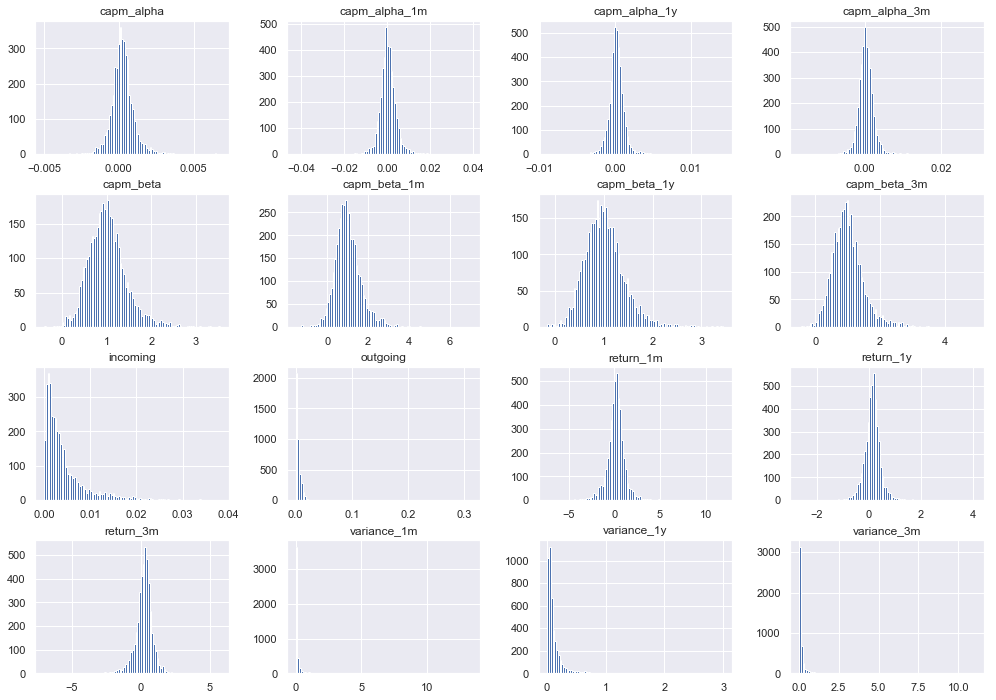

In [17]:
df_panel.hist(bins=100, figsize=[17,12])
plt.show()

In [18]:
df_panel['sum'] = df_panel['incoming'] + df_panel['outgoing']
df_panel.corr()

,incoming,outgoing,capm_beta,capm_alpha,capm_beta_1y,capm_alpha_1y,capm_beta_1m,capm_alpha_1m,capm_beta_3m,capm_alpha_3m,return_1y,return_1m,return_3m,variance_1y,variance_1m,variance_3m,sum
incoming,1.000000,0.489018,0.663084,0.045442,0.513531,-0.032307,0.405251,0.027977,0.495764,-0.032492,0.087261,0.036550,0.213245,0.467968,0.151902,0.235046,0.822514
outgoing,0.489018,1.000000,0.237289,0.017315,0.177732,-0.039032,0.138413,-0.012723,0.172291,-0.041670,0.025458,0.030977,0.095773,0.147229,0.024287,0.064906,0.898326
capm_beta,0.663084,0.237289,1.000000,-0.025583,0.721651,-0.080452,0.589633,0.017306,0.689869,-0.036373,0.078338,-0.000905,0.169346,0.467004,0.222892,0.284939,0.488688
capm_alpha,0.045442,0.017315,-0.025583,1.000000,-0.016305,0.086057,-0.051469,-0.027389,-0.043706,0.041483,0.522603,0.208387,0.364522,0.073480,-0.011419,-0.022808,0.034177
capm_beta_1y,0.513531,0.177732,0.721651,-0.016305,1.000000,-0.039319,0.678778,0.039674,0.857437,0.024053,0.019508,-0.059185,0.058884,0.430242,0.314817,0.347299,0.374532
capm_alpha_1y,-0.032307,-0.039032,-0.080452,0.086057,-0.039319,1.000000,-0.040221,0.327763,-0.062635,0.545955,-0.062732,-0.052279,-0.028589,0.169663,0.113624,0.182900,-0.041722
capm_beta_1m,0.405251,0.138413,0.589633,-0.051469,0.678778,-0.040221,1.000000,-0.019967,0.803843,-0.032959,-0.017888,-0.017504,0.070182,0.325772,0.238107,0.281846,0.294358
capm_alpha_1m,0.027977,-0.012723,0.017306,-0.027389,0.039674,0.327763,-0.019967,1.000000,0.006058,0.613316,-0.068400,-0.082667,-0.099093,0.141622,0.117870,0.159648,0.005795
capm_beta_3m,0.495764,0.172291,0.689869,-0.043706,0.857437,-0.062635,0.803843,0.006058,1.000000,-0.062355,0.019599,-0.024538,0.106671,0.404497,0.280211,0.315751,0.362036
capm_alpha_3m,-0.032492,-0.041670,-0.036373,0.041483,0.024053,0.545955,-0.032959,0.613316,-0.062355,1.000000,-0.088590,-0.090304,-0.114817,0.144205,0.098955,0.160402,-0.043535


In [19]:
exogs = ['incoming',
         'capm_beta',
         ['incoming','outgoing','capm_beta']]#,'variance_1y']]#,'return_3m']]
effects = [[],
           ['time'],
           ['entity'],
           ['time', 'entity']]

add_outputs = ['Time FE', 'Entity FE', 'N', 'R-squared', 'R-squared (inclusive)']

var_order = ['const','incoming','outgoing','capm_beta']#,'variance_1y']#,'return_3m']

In [20]:
table_panel_regressions = kf.RegressionTable()
endog = 'capm_alpha'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)        (2)       (3)        (4)  \
const                 coeff   0.0002***                                   
                      t-stat   (3.5443)                                   
incoming              coeff     -0.0045    -0.0123    0.0005    -0.0092   
                      t-stat  (-0.5532)  (-1.5544)  (0.0626)  (-1.3728)   
outgoing              coeff                                               
                      t-stat                                              
capm_beta             coeff                                               
                      t-stat                                              
Time FE                           False       True     False       True   
Entity FE                         False      False      True       True   
N                                  3808       3808      3808       3808   
R-squared                        0.0010     0.0056    0.0000     0.0021   
R-squared (inclusive)            0.0010     0.0679    0.1262     0.1905   

                                    (5)        (6)        (7)        (8)  \
const                 coeff   0.0003***                                    
                      t-stat   (4.3279)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff     -0.0001    -0.0001    -0.0002    -0.0001   
                      t-stat  (-0.9429)  (-0.6213)  (-1.2089)  (-0.6909)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  3808       3808       3808       3808   
R-squared                        0.0036     0.0020     0.0046     0.0018   
R-squared (inclusive)            0.0036     0.0645     0.1301     0.1903   

                                    (9)       (10)       (11)       (12)  
const                 coeff   0.0003***                                   
                      t-stat   (3.9469)                                   
incoming              coeff      0.0066    -0.0130     0.0110    -0.0045  
                      t-stat   (0.6016)  (-1.0991)   (0.9910)  (-0.4794)  
outgoing              coeff    -0.0054*   -0.0069*    -0.0030    -0.0041  
                      t-stat  (-1.7887)  (-1.7717)  (-1.3936)  (-1.5143)  
capm_beta             coeff     -0.0001     0.0001    -0.0002    -0.0001  
                      t-stat  (-0.9239)   (0.2722)  (-1.3496)  (-0.2638)  
Time FE                           False       True      False       True  
Entity FE                         False      False       True       True  
N                                  3808       3808       3808       3808  
R-squared                        0.0056     0.0091     0.0073     0.0035  
R-squared (inclusive)            0.0056     0.0711     0.1325     0.1916

In [21]:
table_panel_regressions = kf.RegressionTable()
endog = 'return_1y'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)       (2)         (3)       (4)  \
const                 coeff   0.0854***                                   
                      t-stat   (2.8308)                                   
incoming              coeff   9.3079***   3.3474*  12.0573***    4.2820   
                      t-stat   (3.0004)  (1.7717)    (3.0913)  (1.6001)   
outgoing              coeff                                               
                      t-stat                                              
capm_beta             coeff                                               
                      t-stat                                              
Time FE                           False      True       False      True   
Entity FE                         False     False        True      True   
N                                  4032      4032        4032      4032   
R-squared                        0.0203    0.0025      0.0258    0.0027   
R-squared (inclusive)            0.0203    0.2829      0.0602    0.3182   

                                    (5)       (6)       (7)        (8)  \
const                 coeff   0.1015***                                  
                      t-stat   (2.9167)                                  
incoming              coeff                                              
                      t-stat                                             
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff      0.0266    0.0161    0.0171    -0.0062   
                      t-stat   (0.8273)  (0.5121)  (0.3512)  (-0.1379)   
Time FE                           False      True     False       True   
Entity FE                         False     False      True       True   
N                                  4032      4032      4032       4032   
R-squared                        0.0011    0.0006    0.0002     0.0000   
R-squared (inclusive)            0.0011    0.2815    0.0355     0.3164   

                                     (9)       (10)        (11)       (12)  
const                 coeff    0.1552***                                    
                      t-stat    (4.5421)                                    
incoming              coeff   14.6922***   6.3697**  16.1275***  8.7864***  
                      t-stat    (3.9142)   (2.5519)    (3.5697)   (3.1321)  
outgoing              coeff      -0.8460    -2.0452     -0.0398    -1.2633  
                      t-stat   (-0.7708)  (-1.2280)   (-0.0461)  (-0.8974)  
capm_beta             coeff   -0.0896***    -0.0275   -0.1152**    -0.0721  
                      t-stat   (-2.6736)  (-0.6500)   (-2.1416)  (-1.4428)  
Time FE                            False       True       False       True  
Entity FE                          False      False        True       True  
N                                   4032       4032        4032       4032  
R-squared                         0.0272     0.0048      0.0329     0.0062  
R-squared (inclusive)             0.0272     0.2845      0.0671     0.3206

In [22]:
table_panel_regressions = kf.RegressionTable()
endog = 'return_1m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)        (2)       (3)        (4)  \
const                 coeff     0.0086                                   
                      t-stat  (0.0634)                                   
incoming              coeff    23.6152    -3.1571   32.2195    -5.3724   
                      t-stat  (1.3848)  (-0.1906)  (1.6288)  (-0.3140)   
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff                                              
                      t-stat                                             
Time FE                          False       True     False       True   
Entity FE                        False      False      True       True   
N                                 4032       4032      4032       4032   
R-squared                       0.0133     0.0002    0.0188     0.0004   
R-squared (inclusive)           0.0133     0.2183    0.0550     0.2553   

                                    (5)        (6)        (7)        (8)  \
const                 coeff     0.2407*                                    
                      t-stat   (1.6941)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff     -0.1216    -0.1545    -0.2233    -0.3007   
                      t-stat  (-0.6643)  (-0.8084)  (-1.0909)  (-1.4100)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  4032       4032       4032       4032   
R-squared                        0.0024     0.0047     0.0039     0.0086   
R-squared (inclusive)            0.0024     0.2218     0.0406     0.2614   

                                     (9)       (10)       (11)       (12)  
const                 coeff    0.4368***                                   
                      t-stat    (3.4762)                                   
incoming              coeff   54.2690***  23.2715**  55.0705**   21.5360*  
                      t-stat    (2.6978)   (2.1460)   (2.3896)   (1.7461)  
outgoing              coeff      -0.4887    -4.7899     1.6067    -3.6168  
                      t-stat   (-0.2894)  (-1.3964)   (0.7479)  (-1.0729)  
capm_beta             coeff    -0.5605**    -0.3234  -0.6813**   -0.4607*  
                      t-stat   (-2.3561)  (-1.5534)  (-2.2102)  (-1.9042)  
Time FE                            False       True      False       True  
Entity FE                          False      False       True       True  
N                                   4032       4032       4032       4032  
R-squared                         0.0412     0.0093     0.0447     0.0121  
R-squared (inclusive)             0.0412     0.2254     0.0800     0.2640

In [23]:
table_panel_regressions = kf.RegressionTable()
endog = 'return_3m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)         (3)         (4)  \
const                 coeff       0.0281                                       
                      t-stat    (0.3123)                                       
incoming              coeff   31.3889***  20.4894***  41.3844***  30.7061***   
                      t-stat    (4.8880)    (3.8962)    (4.0531)    (3.2946)   
outgoing              coeff                                                    
                      t-stat                                                   
capm_beta             coeff                                                    
                      t-stat                                                   
Time FE                            False        True       False        True   
Entity FE                          False       False        True        True   
N                                   4032        4032        4032        4032   
R-squared                         0.0576      0.0232      0.0761      0.0337   
R-squared (inclusive)             0.0576      0.2808      0.1132      0.3273   

                                   (5)       (6)       (7)       (8)  \
const                 coeff     0.0678                                 
                      t-stat  (1.1370)                                 
incoming              coeff                                            
                      t-stat                                           
outgoing              coeff                                            
                      t-stat                                           
capm_beta             coeff     0.1039    0.1177    0.2169   0.2527*   
                      t-stat  (1.0483)  (1.1984)  (1.5295)  (1.6459)   
Time FE                          False      True     False      True   
Entity FE                        False     False      True      True   
N                                 4032      4032      4032      4032   
R-squared                       0.0042    0.0072    0.0089    0.0159   
R-squared (inclusive)           0.0042    0.2690    0.0487    0.3149   

                                     (9)        (10)        (11)        (12)  
const                 coeff    0.2298***                                      
                      t-stat    (2.9268)                                      
incoming              coeff   45.1713***  29.1556***  46.0710***  29.5656***  
                      t-stat    (3.0051)    (2.9668)    (2.9852)    (4.0103)  
outgoing              coeff       1.0493     -0.3254    1.8310**      0.4409  
                      t-stat    (1.2740)   (-0.3510)    (2.1945)    (0.4487)  
capm_beta             coeff     -0.2668*     -0.1139     -0.1680      0.0173  
                      t-stat   (-1.6478)   (-0.8365)   (-0.8374)    (0.1084)  
Time FE                            False        True       False        True  
Entity FE                          False       False        True        True  
N                                   4032        4032        4032        4032  
R-squared                         0.0735      0.0259      0.0804      0.0338  
R-squared (inclusive)             0.0735      0.2828      0.1173      0.3273

In [24]:
table_panel_regressions = kf.RegressionTable()
endog = 'variance_1y'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)       (3)       (4)  \
const                 coeff   0.1060***                                   
                      t-stat   (3.4878)                                   
incoming              coeff    5.9765**  10.4980***    1.5278    5.7421   
                      t-stat   (2.0861)    (3.0841)  (0.4339)  (1.5553)   
outgoing              coeff                                               
                      t-stat                                              
capm_beta             coeff                                               
                      t-stat                                              
Time FE                           False        True     False      True   
Entity FE                         False       False      True      True   
N                                  4032        4032      4032      4032   
R-squared                        0.0199      0.0572    0.0011    0.0133   
R-squared (inclusive)            0.0199      0.2956    0.1604    0.4201   

                                    (5)        (6)        (7)        (8)  \
const                 coeff     -0.0213                                    
                      t-stat  (-1.2195)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff   0.1530***  0.1708***  0.0842***  0.1198***   
                      t-stat   (4.1614)   (4.1896)   (3.0405)   (3.4001)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  4032       4032       4032       4032   
R-squared                        0.0870     0.1418     0.0147     0.0404   
R-squared (inclusive)            0.0870     0.3588     0.1718     0.4360   

                                    (9)       (10)       (11)       (12)  
const                 coeff     -0.0278                                   
                      t-stat  (-1.2497)                                   
incoming              coeff     -2.3220   -4.4798*    -0.9967    -1.1466  
                      t-stat  (-0.5986)  (-1.9476)  (-0.2405)  (-0.4481)  
outgoing              coeff    -2.3405*   -2.1652*   -1.3343*   -0.8444*  
                      t-stat  (-1.7070)  (-1.8814)  (-1.7473)  (-1.9437)  
capm_beta             coeff   0.1806***  0.2142***   0.0970**  0.1314***  
                      t-stat   (3.0469)   (3.9204)   (2.3125)   (3.3067)  
Time FE                           False       True      False       True  
Entity FE                         False      False       True       True  
N                                  4032       4032       4032       4032  
R-squared                        0.0961     0.1526     0.0174     0.0417  
R-squared (inclusive)            0.0961     0.3669     0.1741     0.4368

In [25]:
table_panel_regressions = kf.RegressionTable()
endog = 'variance_1m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)       (2)        (3)        (4)  \
const                 coeff   0.1233***                                   
                      t-stat   (3.2833)                                   
incoming              coeff      0.1166  6.6770**    -6.6240    -0.7128   
                      t-stat   (0.0506)  (2.0975)  (-1.5996)  (-0.2132)   
outgoing              coeff                                               
                      t-stat                                              
capm_beta             coeff                                               
                      t-stat                                              
Time FE                           False      True      False       True   
Entity FE                         False     False       True       True   
N                                  4032      4032       4032       4032   
R-squared                        0.0000    0.0085     0.0080     0.0001   
R-squared (inclusive)            0.0000    0.1892     0.1121     0.2873   

                                    (5)        (6)       (7)       (8)  \
const                 coeff      0.0020                                  
                      t-stat   (0.1844)                                  
incoming              coeff                                              
                      t-stat                                             
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff   0.1203***  0.1376***    0.0029    0.0348   
                      t-stat   (3.9202)   (3.7006)  (0.0745)  (1.0328)   
Time FE                           False       True     False      True   
Entity FE                         False      False      True      True   
N                                  4032       4032      4032      4032   
R-squared                        0.0216     0.0337    0.0000    0.0011   
R-squared (inclusive)            0.0216     0.2098    0.1050    0.2880   

                                    (9)        (10)       (11)       (12)  
const                 coeff   -0.0304**                                    
                      t-stat  (-2.1569)                                    
incoming              coeff   -9.5393**  -7.9480***   -8.3255*   -4.4156*  
                      t-stat  (-2.0883)   (-3.1372)  (-1.8246)  (-1.7947)  
outgoing              coeff    -2.4490*    -1.8718*  -1.4861**   -0.5587*  
                      t-stat  (-1.7954)   (-1.9484)  (-2.2084)  (-1.8122)  
capm_beta             coeff   0.2070***   0.2076***    0.0764*   0.0714**  
                      t-stat   (3.2764)    (4.0219)   (1.9191)   (2.4902)  
Time FE                           False        True      False       True  
Entity FE                         False       False       True       True  
N                                  4032        4032       4032       4032  
R-squared                        0.0396      0.0410     0.0122     0.0029  
R-squared (inclusive)            0.0396      0.2158     0.1159     0.2893

In [26]:
table_panel_regressions = kf.RegressionTable()
endog = 'variance_3m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)       (2)        (3)       (4)  \
const                 coeff   0.1513***                                  
                      t-stat   (2.8202)                                  
incoming              coeff      2.2702  9.8930**    -4.9543    2.3472   
                      t-stat   (0.6898)  (2.4502)  (-0.8973)  (0.4644)   
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff                                              
                      t-stat                                             
Time FE                           False      True      False      True   
Entity FE                         False     False       True      True   
N                                  4032      4032       4032      4032   
R-squared                        0.0010    0.0199     0.0038    0.0008   
R-squared (inclusive)            0.0010    0.3564     0.0904    0.4307   

                                    (5)        (6)       (7)       (8)  \
const                 coeff      0.0065                                  
                      t-stat   (0.4678)                                  
incoming              coeff                                              
                      t-stat                                             
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff   0.1534***  0.1758***    0.0385    0.0819   
                      t-stat   (3.7456)   (3.6414)  (0.9523)  (1.5738)   
Time FE                           False       True     False      True   
Entity FE                         False      False      True      True   
N                                  4032       4032      4032      4032   
R-squared                        0.0300     0.0588    0.0010    0.0067   
R-squared (inclusive)            0.0300     0.3819    0.0879    0.4341   

                                     (9)        (10)        (11)       (12)  
const                 coeff      -0.0211                                     
                      t-stat   (-1.0744)                                     
incoming              coeff      -8.3427   -6.7565**     -7.2560    -3.3742  
                      t-stat   (-1.3960)   (-2.2556)   (-1.1605)  (-0.9948)  
outgoing              coeff   -3.1676***  -2.4600***  -2.1166***   -1.0243*  
                      t-stat   (-2.6052)   (-2.9075)   (-3.3886)  (-1.9493)  
capm_beta             coeff    0.2331***   0.2384***    0.1054**   0.1116**  
                      t-stat    (2.7607)    (3.5905)    (2.0244)   (2.3797)  
Time FE                            False        True       False       True  
Entity FE                          False       False        True       True  
N                                   4032        4032        4032       4032  
R-squared                         0.0449      0.0662      0.0106     0.0083  
R-squared (inclusive)             0.0449      0.3868      0.0966     0.4350

In [27]:
table_panel_regressions = kf.RegressionTable()
endog = 'capm_beta_3m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)       (3)        (4)  \
const                 coeff    0.8439***                                    
                      t-stat   (26.2266)                                    
incoming              coeff   36.0998***  51.4526***    9.6722  17.1521**   
                      t-stat    (6.4285)    (8.2392)  (1.4387)   (2.1846)   
outgoing              coeff                                                 
                      t-stat                                                
capm_beta             coeff                                                 
                      t-stat                                                
Time FE                            False        True     False       True   
Entity FE                          False       False      True       True   
N                                   3808        3808      3808       3808   
R-squared                         0.1527      0.2225    0.0138     0.0264   
R-squared (inclusive)             0.1527      0.2316    0.4381     0.4566   

                                    (5)        (6)        (7)        (8)  \
const                 coeff   0.3324***                                    
                      t-stat   (4.5157)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff   0.6725***  0.6865***  0.3170***  0.3312***   
                      t-stat  (10.4360)  (10.5324)   (4.4333)   (4.4881)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  3808       3808       3808       3808   
R-squared                        0.3464     0.3577     0.0631     0.0672   
R-squared (inclusive)            0.3464     0.3652     0.4662     0.4794   

                                    (9)       (10)       (11)       (12)  
const                 coeff   0.3360***                                   
                      t-stat   (4.0892)                                   
incoming              coeff      0.6306     2.1010    -0.3740    -1.0414  
                      t-stat   (0.1708)   (0.5642)  (-0.0827)  (-0.3012)  
outgoing              coeff     -1.3777    -0.8608    -2.0986    -1.9887  
                      t-stat  (-0.9707)  (-0.6531)  (-1.3534)  (-1.2799)  
capm_beta             coeff   0.6724***  0.6724***  0.3271***  0.3456***  
                      t-stat   (7.9117)   (8.5973)   (5.0803)   (5.0797)  
Time FE                           False       True      False       True  
Entity FE                         False      False       True       True  
N                                  3808       3808       3808       3808  
R-squared                        0.3467     0.3579     0.0645     0.0683  
R-squared (inclusive)            0.3467     0.3654     0.4670     0.4800

In [28]:
df_panel

incoming  outgoing  capm_beta  capm_alpha  capm_beta_1y  \
permno date                                                            
10104  2001  0.015617  0.014825   2.268738    0.000809      1.598201   
       2002  0.018880  0.012479   1.949791    0.000394      1.447317   
       2003  0.012450  0.007430   1.540294    0.000014      1.379796   
       2004  0.005524  0.004213   1.432869   -0.000593      0.976659   
       2005  0.001920  0.001770   1.180714   -0.000540      0.971345   
...               ...       ...        ...         ...           ...   
87432  2019       NaN       NaN        NaN         NaN           NaN   
87447  2019       NaN       NaN        NaN         NaN           NaN   
88031  2019       NaN       NaN        NaN         NaN           NaN   
91556  2019       NaN       NaN        NaN         NaN           NaN   
92655  2019       NaN       NaN        NaN         NaN           NaN   

             capm_alpha_1y  capm_beta_1m  capm_alpha_1m  capm_beta_3m  \
permno date                                                             
10104  2001       0.001205      2.257448       0.012636      0.989003   
       2002      -0.000559      1.690478       0.007737      1.415551   
       2003      -0.000315      1.661619      -0.000361      1.192260   
       2004      -0.000611      1.333925       0.001105      1.474856   
       2005       0.000973      1.088020      -0.000294      1.051477   
...                    ...           ...            ...           ...   
87432  2019            NaN           NaN            NaN           NaN   
87447  2019            NaN           NaN            NaN           NaN   
88031  2019            NaN           NaN            NaN           NaN   
91556  2019            NaN           NaN            NaN           NaN   
92655  2019            NaN           NaN            NaN           NaN   

             capm_alpha_3m  return_1y  return_1m  return_3m  variance_1y  \
permno date                                                                
10104  2001      -0.000843  -0.473362  -0.101567   0.465956     0.641590   
       2002       0.001211  -0.051849  -1.255011   1.412520     0.422751   
       2003      -0.001622   0.263301   1.124397   0.670829     0.142846   
       2004      -0.000485   0.068855   0.913363   0.801963     0.089436   
       2005       0.001113  -0.120224  -0.397507  -0.075128     0.051643   
...                    ...        ...        ...        ...          ...   
87432  2019            NaN   0.252247   0.672877   0.428789     0.059868   
87447  2019            NaN   0.224693  -0.271954  -0.057818     0.058679   
88031  2019            NaN   0.269573   0.718573   0.350426     0.071336   
91556  2019            NaN   0.346284   0.044908   0.233304     0.042965   
92655  2019            NaN   0.192589   0.627362   1.217761     0.063857   

             variance_1m  variance_3m       sum  
permno date                                      
10104  2001     0.253971     0.245922  0.030442  
       2002     0.350794     0.352262  0.031359  
       2003     0.070903     0.083732  0.019880  
       2004     0.176160     0.095672  0.009737  
       2005     0.036353     0.046529  0.003690  
...                  ...          ...       ...  
87432  2019     0.016733     0.029248       NaN  
87447  2019     0.033918     0.041362       NaN  
88031  2019     0.019682     0.022906       NaN  
91556  2019     0.016301     0.025332       NaN  
92655  2019     0.016441     0.056356       NaN  

[4480 rows x 17 columns]

# TRIALS

In [28]:
exogs = ['incoming',
         'capm_beta',
         ['incoming','outgoing','capm_beta']]#,'variance_1y','return_3m']]
effects = [[],
           ['time'],
           ['entity'],
           ['time', 'entity']]

add_outputs = ['Time FE', 'Entity FE', 'N', 'R-squared', 'R-squared (inclusive)']

var_order = ['const','incoming','outgoing','capm_beta']#,'variance_1y','return_3m']

In [29]:
trial=1

inc = pd.read_csv('../data/external/trial/IN'+str(trial)+'.csv', header=None)
inc.index = return_matrix.columns
inc.columns = opt_dates.year
inc = inc.stack()
df_panel['incoming'] = inc

outg = pd.read_csv('../data/external/trial/OUT'+str(trial)+'.csv', header=None)
outg.index = return_matrix.columns
outg.columns = opt_dates.year
outg = outg.stack()
df_panel['outgoing'] = outg

In [30]:
df_panel.corr()

,incoming,outgoing,capm_beta,capm_alpha,capm_beta_1y,capm_alpha_1y,capm_beta_1m,capm_alpha_1m,capm_beta_3m,capm_alpha_3m,return_1y,return_1m,return_3m,variance_1y,variance_1m,variance_3m,sum
incoming,1.000000,0.853684,0.724500,0.128153,0.524850,0.019295,0.408980,0.057137,0.497910,0.002603,0.120185,0.027846,0.271453,0.702035,0.250600,0.339731,0.672886
outgoing,0.853684,1.000000,0.566003,0.122343,0.407867,-0.018562,0.314462,0.022982,0.395951,-0.038836,0.077718,0.028305,0.258818,0.438917,0.099965,0.182772,0.753594
capm_beta,0.724500,0.566003,1.000000,-0.025583,0.721651,-0.080452,0.589633,0.017306,0.689869,-0.036373,0.078338,-0.000905,0.169346,0.467004,0.222892,0.284939,0.488688
capm_alpha,0.128153,0.122343,-0.025583,1.000000,-0.016305,0.086057,-0.051469,-0.027389,-0.043706,0.041483,0.522603,0.208387,0.364522,0.073480,-0.011419,-0.022808,0.034177
capm_beta_1y,0.524850,0.407867,0.721651,-0.016305,1.000000,-0.039319,0.678778,0.039674,0.857437,0.024053,0.019508,-0.059185,0.058884,0.430242,0.314817,0.347299,0.374532
capm_alpha_1y,0.019295,-0.018562,-0.080452,0.086057,-0.039319,1.000000,-0.040221,0.327763,-0.062635,0.545955,-0.062732,-0.052279,-0.028589,0.169663,0.113624,0.182900,-0.041722
capm_beta_1m,0.408980,0.314462,0.589633,-0.051469,0.678778,-0.040221,1.000000,-0.019967,0.803843,-0.032959,-0.017888,-0.017504,0.070182,0.325772,0.238107,0.281846,0.294358
capm_alpha_1m,0.057137,0.022982,0.017306,-0.027389,0.039674,0.327763,-0.019967,1.000000,0.006058,0.613316,-0.068400,-0.082667,-0.099093,0.141622,0.117870,0.159648,0.005795
capm_beta_3m,0.497910,0.395951,0.689869,-0.043706,0.857437,-0.062635,0.803843,0.006058,1.000000,-0.062355,0.019599,-0.024538,0.106671,0.404497,0.280211,0.315751,0.362036
capm_alpha_3m,0.002603,-0.038836,-0.036373,0.041483,0.024053,0.545955,-0.032959,0.613316,-0.062355,1.000000,-0.088590,-0.090304,-0.114817,0.144205,0.098955,0.160402,-0.043535


In [31]:
table_panel_regressions = kf.RegressionTable()
endog = 'capm_beta_3m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)          (2)       (3)         (4)  \
const                 coeff    0.8390***                                      
                      t-stat   (25.9093)                                      
incoming              coeff   84.5629***  117.6463***  32.1561*  53.2341***   
                      t-stat    (6.4967)     (7.4164)  (1.9405)    (3.2019)   
outgoing              coeff                                                   
                      t-stat                                                  
capm_beta             coeff                                                   
                      t-stat                                                  
Time FE                            False         True     False        True   
Entity FE                          False        False      True        True   
N                                   3808         3808      3808        3808   
R-squared                         0.1729       0.2481    0.0330      0.0595   
R-squared (inclusive)             0.1729       0.2568    0.4490      0.4751   

                                    (5)        (6)        (7)        (8)  \
const                 coeff   0.3324***                                    
                      t-stat   (4.5157)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff   0.6725***  0.6865***  0.3170***  0.3312***   
                      t-stat  (10.4360)  (10.5324)   (4.4333)   (4.4881)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  3808       3808       3808       3808   
R-squared                        0.3464     0.3577     0.0631     0.0672   
R-squared (inclusive)            0.3464     0.3652     0.4662     0.4794   

                                    (9)       (10)        (11)        (12)  
const                 coeff   0.3329***                                     
                      t-stat   (3.2602)                                     
incoming              coeff      2.4449    -6.6097     34.4351     33.1388  
                      t-stat   (0.1339)  (-0.3812)    (1.3586)    (1.2562)  
outgoing              coeff    -12.5249   -20.1243  -38.3588**  -33.4344**  
                      t-stat  (-0.9880)  (-1.4454)   (-2.4532)   (-2.5548)  
capm_beta             coeff   0.6928***  0.7632***   0.2592***   0.2636***  
                      t-stat   (6.1048)   (7.2686)    (4.1028)    (3.3311)  
Time FE                           False       True       False        True  
Entity FE                         False      False        True        True  
N                                  3808       3808        3808        3808  
R-squared                        0.3475     0.3595      0.0714      0.0744  
R-squared (inclusive)            0.3475     0.3670      0.4709      0.4834

In [32]:
table_panel_regressions = kf.RegressionTable()
endog = 'return_1y'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)       (2)        (3)       (4)  \
const                 coeff    0.0852**                                  
                      t-stat   (2.5046)                                  
incoming              coeff   21.2987**   11.6973  26.0642**  14.5312*   
                      t-stat   (2.0007)  (1.5739)   (2.0541)  (1.6977)   
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff                                              
                      t-stat                                             
Time FE                           False      True      False      True   
Entity FE                         False     False       True      True   
N                                  4032      4032       4032      4032   
R-squared                        0.0219    0.0066     0.0259    0.0072   
R-squared (inclusive)            0.0219    0.2858     0.0603    0.3213   

                                    (5)       (6)       (7)        (8)  \
const                 coeff   0.1015***                                  
                      t-stat   (2.9167)                                  
incoming              coeff                                              
                      t-stat                                             
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff      0.0266    0.0161    0.0171    -0.0062   
                      t-stat   (0.8273)  (0.5121)  (0.3512)  (-0.1379)   
Time FE                           False      True     False       True   
Entity FE                         False     False      True       True   
N                                  4032      4032      4032       4032   
R-squared                        0.0011    0.0006    0.0002     0.0000   
R-squared (inclusive)            0.0011    0.2815    0.0355     0.3164   

                                    (9)        (10)       (11)       (12)  
const                 coeff   0.1916***                                    
                      t-stat   (5.0028)                                    
incoming              coeff   46.4210**   42.4163**  53.7864**  54.8811**  
                      t-stat   (2.3190)    (2.2147)   (2.4965)   (2.4015)  
outgoing              coeff    -12.4909  -33.3495**   -16.4832  -35.9135*  
                      t-stat  (-0.9523)   (-1.9978)  (-1.1436)  (-1.7580)  
capm_beta             coeff   -0.1304**     -0.0762  -0.1844**  -0.1669**  
                      t-stat  (-2.4015)   (-1.4876)  (-2.2799)  (-2.0652)  
Time FE                           False        True      False       True  
Entity FE                         False       False       True       True  
N                                  4032        4032       4032       4032  
R-squared                        0.0345      0.0215     0.0408     0.0292  
R-squared (inclusive)            0.0345      0.2965     0.0747     0.3363

In [33]:
table_panel_regressions = kf.RegressionTable()
endog = 'return_1m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)        (2)       (3)        (4)  \
const                 coeff     0.0484                                   
                      t-stat  (0.3265)                                   
incoming              coeff    34.0909   -15.5118   45.9225   -21.0370   
                      t-stat  (0.6144)  (-0.3248)  (0.7606)  (-0.4429)   
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff                                              
                      t-stat                                             
Time FE                          False       True     False       True   
Entity FE                        False      False      True       True   
N                                 4032       4032      4032       4032   
R-squared                       0.0057     0.0011    0.0082     0.0014   
R-squared (inclusive)           0.0057     0.2189    0.0448     0.2561   

                                    (5)        (6)        (7)        (8)  \
const                 coeff     0.2407*                                    
                      t-stat   (1.6941)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff     -0.1216    -0.1545    -0.2233    -0.3007   
                      t-stat  (-0.6643)  (-0.8084)  (-1.0909)  (-1.4100)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  4032       4032       4032       4032   
R-squared                        0.0024     0.0047     0.0039     0.0086   
R-squared (inclusive)            0.0024     0.2218     0.0406     0.2614   

                                    (9)        (10)        (11)         (12)  
const                 coeff   0.4450***                                       
                      t-stat   (3.7978)                                       
incoming              coeff    97.7885*     71.3131  109.8478**    95.5819**  
                      t-stat   (1.7131)    (1.4284)    (2.0352)     (2.2173)  
outgoing              coeff     10.3171  -87.4958**      3.0276  -113.6492**  
                      t-stat   (0.2367)   (-2.3418)    (0.0593)    (-2.0869)  
capm_beta             coeff    -0.5399*     -0.2349    -0.7309*      -0.4479  
                      t-stat  (-1.9156)   (-1.0480)   (-1.8690)    (-1.4007)  
Time FE                           False        True       False         True  
Entity FE                         False       False        True         True  
N                                  4032        4032        4032         4032  
R-squared                        0.0282      0.0119      0.0327       0.0187  
R-squared (inclusive)            0.0282      0.2274      0.0684       0.2689

In [34]:
table_panel_regressions = kf.RegressionTable()
endog = 'return_3m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)          (3)         (4)  \
const                 coeff       0.0069                                        
                      t-stat    (0.0789)                                        
incoming              coeff   81.8715***  49.5413***  107.4353***  74.0908***   
                      t-stat    (6.5464)    (3.8214)     (4.9343)    (3.4053)   
outgoing              coeff                                                     
                      t-stat                                                    
capm_beta             coeff                                                     
                      t-stat                                                    
Time FE                            False        True        False        True   
Entity FE                          False       False         True        True   
N                                   4032        4032         4032        4032   
R-squared                         0.0806      0.0289       0.1104      0.0459   
R-squared (inclusive)             0.0806      0.2849       0.1461      0.3358   

                                   (5)       (6)       (7)       (8)  \
const                 coeff     0.0678                                 
                      t-stat  (1.1370)                                 
incoming              coeff                                            
                      t-stat                                           
outgoing              coeff                                            
                      t-stat                                           
capm_beta             coeff     0.1039    0.1177    0.2169   0.2527*   
                      t-stat  (1.0483)  (1.1984)  (1.5295)  (1.6459)   
Time FE                          False      True     False      True   
Entity FE                        False     False      True      True   
N                                 4032      4032      4032      4032   
R-squared                       0.0042    0.0072    0.0089    0.0159   
R-squared (inclusive)           0.0042    0.2690    0.0487    0.3149   

                                      (9)        (10)         (11)  \
const                 coeff     0.3069***                            
                      t-stat     (3.7286)                            
incoming              coeff   106.7573***  92.7604***  118.6803***   
                      t-stat     (3.2748)    (2.9833)     (3.4345)   
outgoing              coeff      52.0694*     29.2524      41.0523   
                      t-stat     (1.8853)    (0.9458)     (1.4209)   
capm_beta             coeff    -0.4505***   -0.3276**    -0.4304**   
                      t-stat    (-3.0766)   (-2.2769)    (-2.3868)   
Time FE                             False        True        False   
Entity FE                           False       False         True   
N                                    4032        4032         4032   
R-squared                          0.1273      0.0430       0.1368   
R-squared (inclusive)              0.1273      0.2953       0.1715   

                                     (12)  
const                 coeff                
                      t-stat               
incoming              coeff   103.3816***  
                      t-stat     (3.2784)  
outgoing              coeff       14.2572  
                      t-stat     (0.5259)  
capm_beta             coeff      -0.2626*  
                      t-stat    (-1.6539)  
Time FE                              True  
Entity FE                            True  
N                                    4032  
R-squared                          0.0518  
R-squared (inclusive)              0.3398

In [35]:
table_panel_regressions = kf.RegressionTable()
endog = 'variance_1y'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1),\
            add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)       (3)         (4)  \
const                 coeff    0.0876***                                     
                      t-stat    (2.7675)                                     
incoming              coeff   22.6483***  34.2649***   10.1479  20.2166***   
                      t-stat    (3.2122)    (4.4767)  (1.0858)    (2.6222)   
outgoing              coeff                                                  
                      t-stat                                                 
capm_beta             coeff                                                  
                      t-stat                                                 
Time FE                            False        True     False        True   
Entity FE                          False       False      True        True   
N                                   4032        4032      4032        4032   
R-squared                         0.0588      0.1299    0.0107      0.0386   
R-squared (inclusive)             0.0588      0.3499    0.1685      0.4350   

                                    (5)        (6)        (7)        (8)  \
const                 coeff     -0.0213                                    
                      t-stat  (-1.2195)                                    
incoming              coeff                                                
                      t-stat                                               
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff   0.1530***  0.1708***  0.0842***  0.1198***   
                      t-stat   (4.1614)   (4.1896)   (3.0405)   (3.4001)   
Time FE                           False       True      False       True   
Entity FE                         False      False       True       True   
N                                  4032       4032       4032       4032   
R-squared                        0.0870     0.1418     0.0147     0.0404   
R-squared (inclusive)            0.0870     0.3588     0.1718     0.4360   

                                      (9)         (10)         (11)  \
const                 coeff        0.0390                             
                      t-stat     (1.3121)                             
incoming              coeff     38.3778**     30.2673*      25.8837   
                      t-stat     (2.1320)     (1.9393)     (1.4544)   
outgoing              coeff   -45.9636***  -50.3461***  -29.1445***   
                      t-stat    (-3.2081)    (-3.5998)    (-2.7181)   
capm_beta             coeff        0.1086     0.1681**       0.0427   
                      t-stat     (1.5739)     (2.4309)     (0.6618)   
Time FE                             False         True        False   
Entity FE                           False        False         True   
N                                    4032         4032         4032   
R-squared                          0.1261       0.1867       0.0301   
R-squared (inclusive)              0.1261       0.3923       0.1847   

                                    (12)  
const                 coeff               
                      t-stat              
incoming              coeff      18.8165  
                      t-stat    (1.2093)  
outgoing              coeff   -24.8012**  
                      t-stat   (-2.1419)  
capm_beta             coeff       0.0972  
                      t-stat    (1.4497)  
Time FE                             True  
Entity FE                           True  
N                                   4032  
R-squared                         0.0531  
R-squared (inclusive)             0.4435

In [36]:
table_panel_regressions = kf.RegressionTable()
endog = 'variance_1m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)        (3)       (4)  \
const                 coeff   0.1104***                                    
                      t-stat   (2.7362)                                    
incoming              coeff      6.6128  22.9847***   -12.2201    1.2692   
                      t-stat   (1.0061)    (3.3754)  (-1.0503)  (0.1447)   
outgoing              coeff                                                
                      t-stat                                               
capm_beta             coeff                                                
                      t-stat                                               
Time FE                           False        True      False      True   
Entity FE                         False       False       True      True   
N                                  4032        4032       4032      4032   
R-squared                        0.0020      0.0214     0.0059    0.0001   
R-squared (inclusive)            0.0020      0.1998     0.1102    0.2872   

                                    (5)        (6)       (7)       (8)  \
const                 coeff      0.0020                                  
                      t-stat   (0.1844)                                  
incoming              coeff                                              
                      t-stat                                             
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff   0.1203***  0.1376***    0.0029    0.0348   
                      t-stat   (3.9202)   (3.7006)  (0.0745)  (1.0328)   
Time FE                           False       True     False      True   
Entity FE                         False      False      True      True   
N                                  4032       4032      4032      4032   
R-squared                        0.0216     0.0337    0.0000    0.0011   
R-squared (inclusive)            0.0216     0.2098    0.1050    0.2880   

                                      (9)         (10)         (11)       (12)  
const                 coeff        0.0116                                       
                      t-stat     (0.5325)                                       
incoming              coeff       13.5931       8.5934      -4.7023    -7.7175  
                      t-stat     (0.8280)     (0.5795)    (-0.2991)  (-0.5140)  
outgoing              coeff   -45.9602***  -42.7260***  -22.2629***    -5.8061  
                      t-stat    (-3.0045)    (-3.5492)    (-3.3624)  (-0.6837)  
capm_beta             coeff      0.1757**    0.2045***       0.0825    0.0856*  
                      t-stat     (2.3162)     (2.6708)     (1.5839)   (1.7190)  
Time FE                             False         True        False       True  
Entity FE                           False        False         True       True  
N                                    4032         4032         4032       4032  
R-squared                          0.0445       0.0443       0.0135     0.0024  
R-squared (inclusive)              0.0445       0.2185       0.1170     0.2889

In [37]:
table_panel_regressions = kf.RegressionTable()
endog = 'variance_3m'

for exog in exogs:
    for fixed_effects in effects:
        table_panel_regressions = table_panel_regressions\
            .join_regression(df_panel.fit_panel_regression\
            (endog=endog, exog=exog, fixed_effects=fixed_effects, lag=1)\
            , add_outputs=add_outputs)
table_panel_regressions\
    .change_variable_order(var_order)\
    .change_descriptive_order(add_outputs)

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


(1)         (2)        (3)       (4)  \
const                 coeff   0.1363**                                    
                      t-stat  (2.2737)                                    
incoming              coeff    12.5327  30.9867***    -7.0326    9.1312   
                      t-stat  (1.1915)    (3.4690)  (-0.3972)  (0.6967)   
outgoing              coeff                                               
                      t-stat                                              
capm_beta             coeff                                               
                      t-stat                                              
Time FE                          False        True      False      True   
Entity FE                        False       False       True      True   
N                                 4032        4032       4032      4032   
R-squared                       0.0062      0.0415     0.0016    0.0028   
R-squared (inclusive)           0.0062      0.3706     0.0885    0.4319   

                                    (5)        (6)       (7)       (8)  \
const                 coeff      0.0065                                  
                      t-stat   (0.4678)                                  
incoming              coeff                                              
                      t-stat                                             
outgoing              coeff                                              
                      t-stat                                             
capm_beta             coeff   0.1534***  0.1758***    0.0385    0.0819   
                      t-stat   (3.7456)   (3.6414)  (0.9523)  (1.5738)   
Time FE                           False       True     False      True   
Entity FE                         False      False      True      True   
N                                  4032       4032      4032      4032   
R-squared                        0.0300     0.0588    0.0010    0.0067   
R-squared (inclusive)            0.0300     0.3819    0.0879    0.4341   

                                      (9)         (10)         (11)       (12)  
const                 coeff        0.0242                                       
                      t-stat     (0.6768)                                       
incoming              coeff       17.8026      12.1822       0.4632    -4.2733  
                      t-stat     (0.7599)     (0.6447)     (0.0185)  (-0.2078)  
outgoing              coeff   -47.1297***  -40.6228***  -24.7106***    -4.7454  
                      t-stat    (-3.1706)    (-3.4098)    (-3.4077)  (-0.5540)  
capm_beta             coeff       0.1946*     0.2232**       0.1010     0.1140  
                      t-stat     (1.6738)     (2.3073)     (1.0987)   (1.6150)  
Time FE                             False         True        False       True  
Entity FE                           False        False         True       True  
N                                    4032         4032         4032       4032  
R-squared                          0.0482       0.0687       0.0104     0.0072  
R-squared (inclusive)              0.0482       0.3884       0.0964     0.4344